In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install dependencies (if not already installed)
!pip install xgboost scikit-learn pandas seaborn joblib --quiet


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:23:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Model Accuracy: 0.9252

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     58779
           1       0.95      0.90      0.92     58820

    accuracy                           0.93    117599
   macro avg       0.93      0.93      0.93    117599
weighted avg       0.93      0.93      0.93    117599



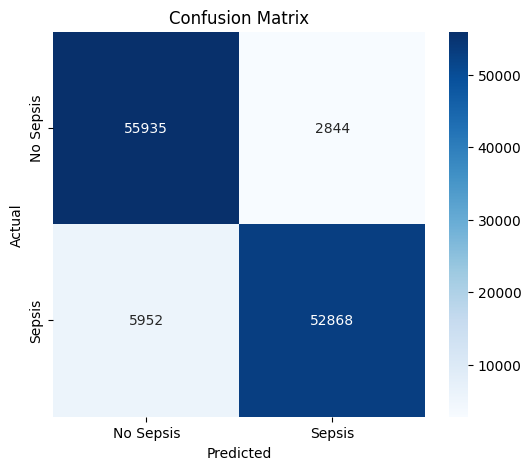

✅ XGBoost Model saved as: xgboost_sepsis_model.pkl


In [ ]:
import pandas as pd
import xgboost as xgb
import joblib  # To save the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/sample_data/balanced_sepsis_data (1).csv"
df = pd.read_csv(file_path)

# Fix column names (remove special characters)
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

# Step 1: Separate features and target
X = df.drop(columns=["SepsisLabel"])  # Features
y = df["SepsisLabel"]  # Target

# Step 2: Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ XGBoost Model Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Save the trained model
model_path = "xgboost_sepsis_model.pkl"
joblib.dump(xgb_model, model_path)
print(f"✅ XGBoost Model saved as: {model_path}")

In [ ]:
!pip install tensorflow keras scikit-learn pandas matplotlib seaborn




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/sample_data/balanced_sepsis_data (1).csv")

# Print the column names to inspect
print("Columns in the dataset:", data.columns)

# Identify the target column dynamically
# Let's assume the target column is the last column (this is just a placeholder, adjust as necessary)
target_column = data.columns[-1]  # Use the last column as the target (modify if needed)
print(f"Using '{target_column}' as the target column")

# Split the dataset into features (X) and target (y)
X = data.drop(target_column, axis=1)  # Features (drop the target column)
y = data[target_column]               # Target (the target column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for ANN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # First hidden layer
model.add(Dense(units=32, activation='relu'))  # Second hidden layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer (for binary classification)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict with the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary labels (0 or 1)

# Calculate accuracy using sklearn (optional for comparison)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy using sklearn: {acc * 100:.2f}%")





Columns in the dataset: Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'Glucose', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime',
       'ICULOS', 'Patient_ID', 'SepsisLabel'],
      dtype='object')
Using 'SepsisLabel' as the target column
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11760/11760 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7105 - loss: 0.5571 - val_accuracy: 0.7614 - val_loss: 0.4841
Epoch 2/50
11760/11760 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7668 - loss: 0.4749 - val_accuracy: 0.7894 - val_loss: 0.4424
Epoch 3/50
11760/11760 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7900 - loss: 0.4405 - val_accuracy: 0.8010 - val_loss: 0.4228
Epoch 4/50
11760/11760 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8009 - loss: 0.4209 - val_accuracy: 0.8082 - val_loss: 0.4067
Epoch 5/50
11760/11760 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8086 - loss: 0.4077 - val_accuracy: 0.8123 - val_loss: 0.4016
Epoch 6/50
11760/11760 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8153 - loss: 0.3995 - val_accuracy: 0.8106 - val_loss: 0.4047
Epoch 7/50
11760/11760 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8181 - loss: 0.3931 - val_accuracy: 0.8223 - val_loss: 0.3863
Epoch 8/50
11760/11760 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8224 - lo

✅ Model Accuracy: 0.9937

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     58779
           1       1.00      0.99      0.99     58820

    accuracy                           0.99    117599
   macro avg       0.99      0.99      0.99    117599
weighted avg       0.99      0.99      0.99    117599



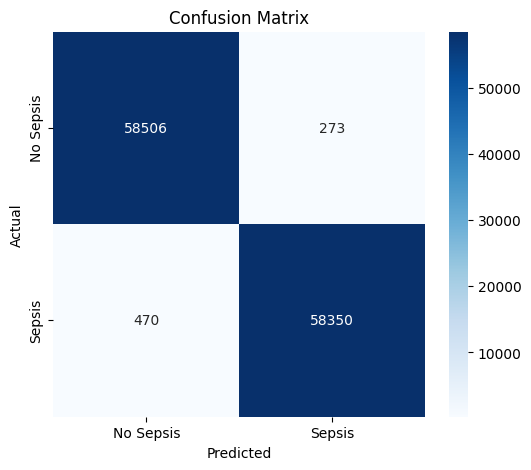

✅ Model saved as: /content/drive/MyDrive/random_forest_sepsis_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import joblib  # To save the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Install necessary libraries (specific to Google Colab)
!pip install -q seaborn scikit-learn joblib pandas matplotlib

# Load the balanced dataset
file_path = "/content/drive/MyDrive/balanced_sepsis_data (1).csv"
df = pd.read_csv(file_path)

# Step 1: Separate features and target
X = df.drop(columns=["SepsisLabel"])  # Features
y = df["SepsisLabel"]  # Target

# Step 2: Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Save the trained model
model_path = "/content/drive/MyDrive/random_forest_sepsis_model.pkl"
joblib.dump(rf_model, model_path)
print(f"✅ Model saved as: {model_path}")

# Step 8: Download the model file (for Google Colab users)
from google.colab import files
files.download(model_path)

✅ Model Accuracy: 0.9987

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    293997
           1       1.00      1.00      1.00    293997

    accuracy                           1.00    587994
   macro avg       1.00      1.00      1.00    587994
weighted avg       1.00      1.00      1.00    587994



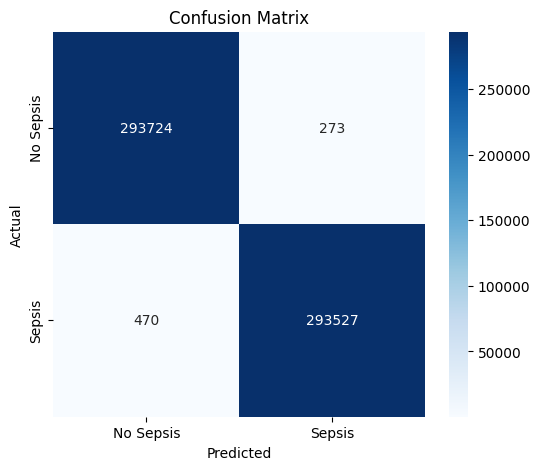

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model_path = "/content/drive/MyDrive/random_forest_sepsis_model.pkl"
rf_model = joblib.load(model_path)

# Load test dataset (ensure it has the same feature columns as training data)
test_file_path = "/content/drive/MyDrive/balanced_sepsis_data (1).csv"  # Change to your actual test file
new_data = pd.read_csv(test_file_path)

# Separate features and target (assuming target is 'SepsisLabel')
X_test = new_data.drop(columns=["SepsisLabel"])
y_test = new_data["SepsisLabel"]

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


